Show DataFrame info.
* Describe DataFrame.
* Show a plot of the total number of responses broken down by response kind.
* Show a plot of the response rate number of responses by the sales channel.
* Show a plot of the response rate by the total claim amount. Show a plot of the distribution of the total claim amount, broken down by response kind. Try a boxplot and distribution plot, for each response kind. For the distribution plot, try to plot both kinds of responses in one chart (you can try with seaborn's histplot, using the hue parameter).
* Show a plot of the response rate by income. Create similar plots like in the task before, but for Income
* NEW: Create a scatterplot between total claim amount and income

In [52]:
import numpy as np

In [53]:
import pandas as pd

In [54]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Show DataFrame info.
filex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [55]:
filex = pd.read_csv("marketing_customer_analysis.csv")

In [56]:
# defined a function to do all the data transformation in one command:
def cleanup(x):
    print(" ")
    print("here is the head:")
    print(" ")
    print(x.head())
    print(" ")
    print("here is the shape:")
    print(" ")
    print(x.shape)
    cols = []
    for i in range(len(x.columns)):
        cols.append(x.columns[i].lower().replace(' ','_'))
    x.columns = cols
    print(" ")
    print("here are the cleaned standardized colums:")
    print(" ")
    print(x.columns)
    print(" ")
    print("here are all numerical columns:")
    print(" ")
    print(x._get_numeric_data().columns)
    print(" ")
    print("here are all categorical columns:")
    print(" ")
    print(x.drop(columns=x._get_numeric_data().columns))
    print(" ")
    print("here are all nan values:")
    print(" ")
    print(x.isna().sum())
    print(" ")
    print("now we extract the dates from the effective do date column and enter them in a new one while converting them to actual months")
    print(" ")
    x['month'] = pd.DatetimeIndex(x['effective_to_date']).month
    print(" ")
    def month(a):
        if a == 1:
            return 'jan'
        elif a == 2:
            return 'feb'
        else:
            return 0
    x['month']=list(map(month,x['month']))
    print(x.head())

In [57]:
cleanup(filex)

 
here is the head:
 
  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Marrie

In [58]:
filex.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,feb
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,jan
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,feb
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,jan
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,feb


In [59]:
filex.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [61]:
# show a plotof the table number of response broken down by response kind
filex.response.value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

<AxesSubplot:>

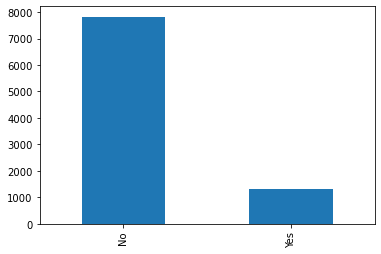

In [60]:
filex['response'].value_counts().plot(kind="bar")


<AxesSubplot:>

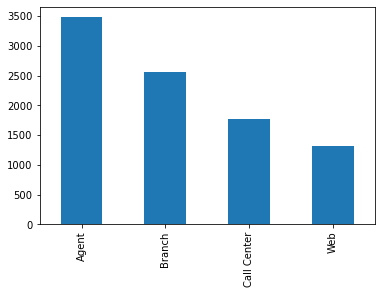

In [62]:
# show a plot of the response rate number of responses by the sales channel.
filex.sales_channel.value_counts().plot(kind = "bar")

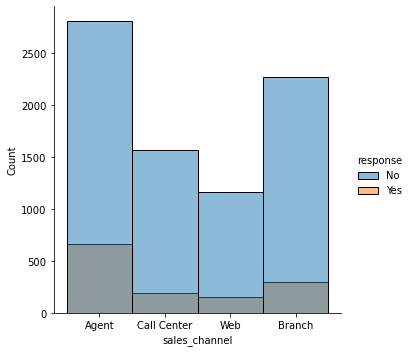

In [63]:
sns.displot(filex, x="sales_channel", hue="response",);

Show a plot of the response rate by the total claim amount. 
Show a plot of the distribution of the total claim amount, broken down by response kind. 
Try a boxplot and distribution plot, for each response kind. 
For the distribution plot, try to plot both kinds of responses in one chart (you can try with seaborn's histplot,
using the hue parameter).

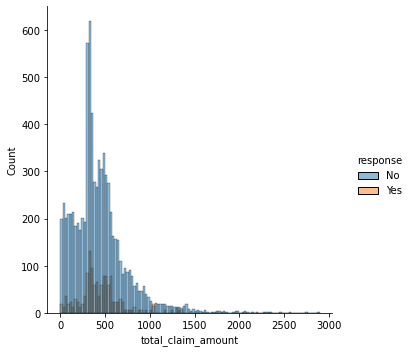

In [65]:
sns.displot(filex, x="total_claim_amount", hue="response");

In [69]:
# Show a plot of the response rate by income. Create similar plots like in the task before, but for Income

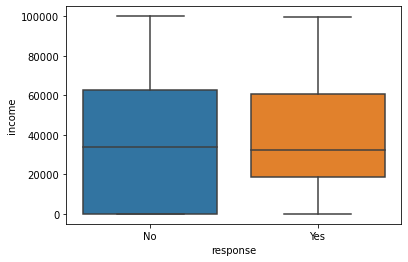

In [70]:
sns.boxplot(y='income', x='response', data = filex);

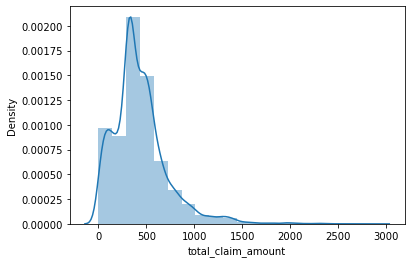

In [78]:
sns.distplot(filex['total_claim_amount'], bins=20);
plt.show()

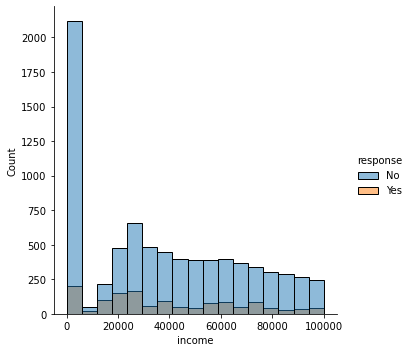

In [71]:
sns.displot(filex, x="income", hue="response");

In [ ]:
# NEW: Create a scatterplot between total claim amount and income

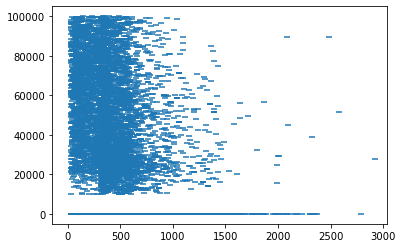

In [72]:
plt.scatter(x=filex['total_claim_amount'], y=filex['income'], marker=1)
plt.show()

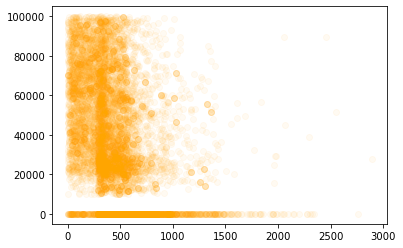

In [81]:
plt.scatter(x=filex['total_claim_amount'], y=filex['income'], alpha=0.05, color="orange")

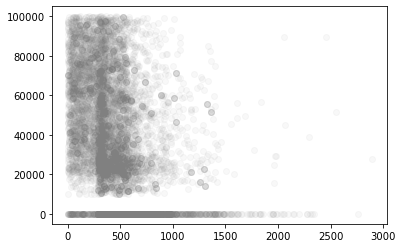

In [82]:
plt.scatter(x=filex['total_claim_amount'], y=filex['income'], alpha=0.05, color="grey")